In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Check the size of rows and columns of the dataset

In [6]:
print(f"your rows are {df.shape[0]} and your columnns are {df.shape[1]}")

your rows are 74 and your columnns are 20


Now let's see how many columns have null values in total.

In [7]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Which team won the most matches?

Text(0.5, 1.0, 'most match win by team')

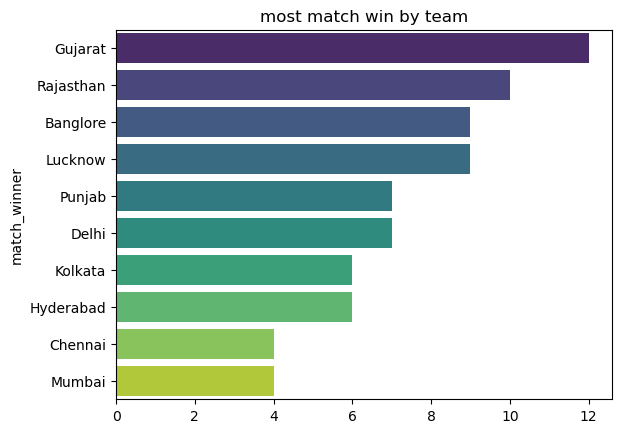

In [8]:
match_wins=df['match_winner'].value_counts()
sns.barplot(y = match_wins.index,x = match_wins.values,palette='viridis')
plt.title("most match win by team")

Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

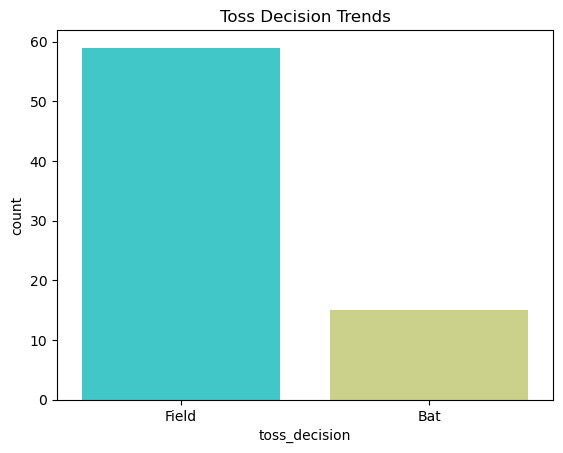

In [9]:
sns.countplot(x = df['toss_decision'],palette='rainbow')
plt.title("Toss Decision Trends")

Toss Winner vs Match Winner

In [10]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]
percentage.round(2)

np.float64(48.65)

How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

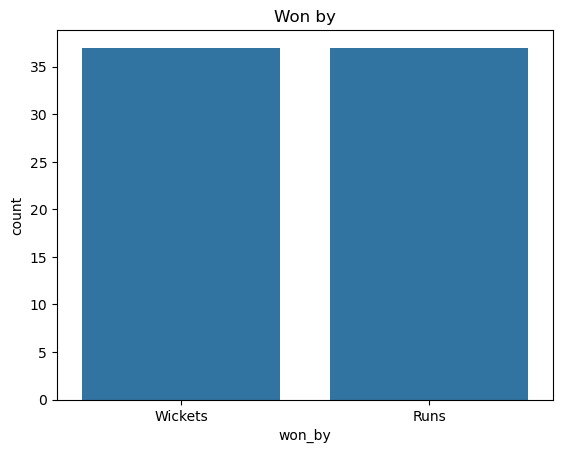

In [12]:
sns.countplot(x = df['won_by'])
plt.title("Won by")

Key Player Performances

1 Most "Player of the Match" Awards

In [17]:
count = df['player_of_the_match'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 players with man of the match')

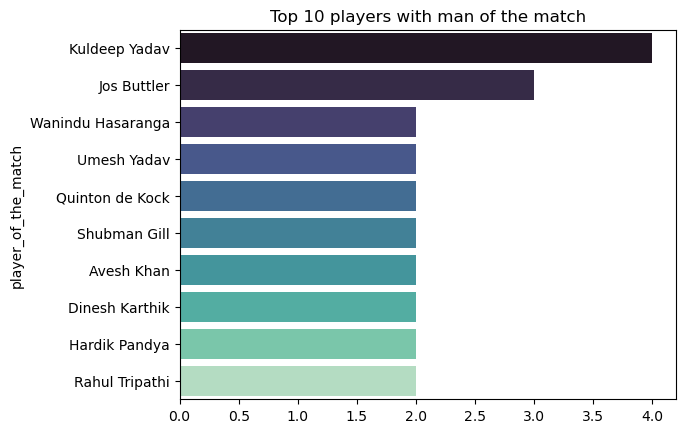

In [21]:
sns.barplot(x = count.values, y = count.index,palette='mako')
plt.title("Top 10 players with man of the match")

2 Top Scorers

In [26]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)

<Axes: ylabel='top_scorer'>

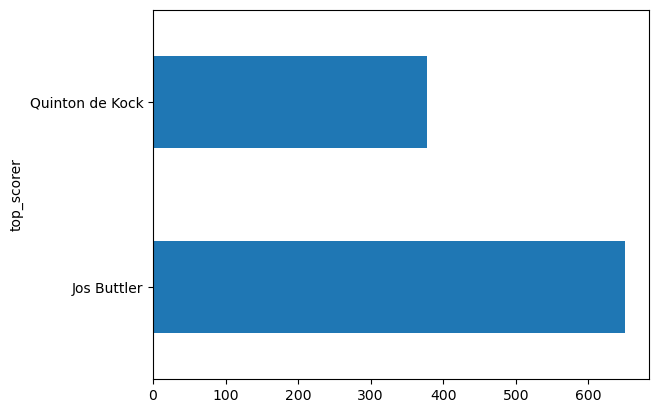

In [27]:
high.plot(kind = 'barh')

10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

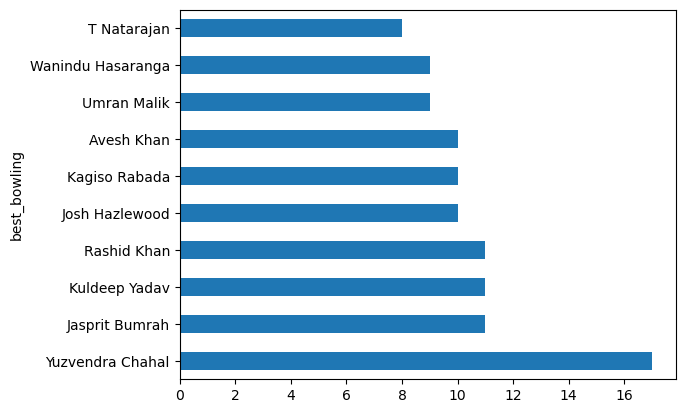

In [38]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby("best_bowling")['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers
top_bowlers.plot(kind = 'barh')

Venue Analysis

Most Matches Played by Venue

<Axes: ylabel='venue'>

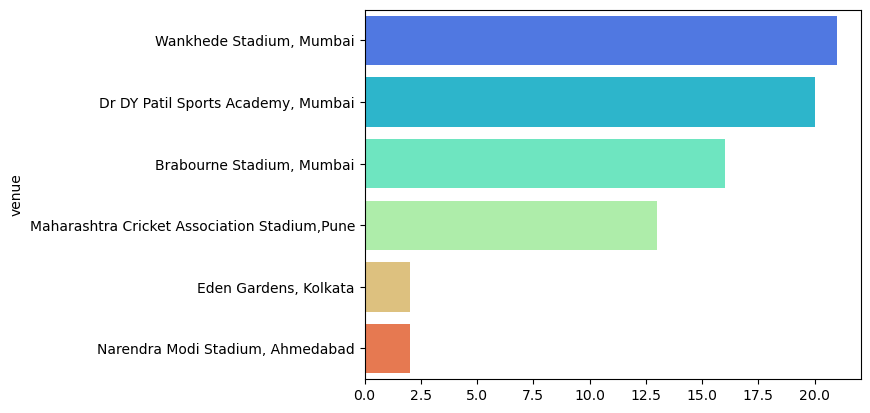

In [45]:
venue_count = df ['venue'].value_counts()
venue_count
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

Custom Questions & Insights

Q1: Who won the highest margin by runs?

In [49]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [52]:
df[df['highscore']== df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [54]:
df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
